In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True
sys.path.append('./src')
from utils_pde_shock_elasticity import computeElas

# Load Results

In [2]:
def return_solution(rho, gamma, Delta, delta, alpha, action_name):

    outputdir = f"./output/{action_name}/Delta_{Delta}/delta_{delta}/gamma_{gamma}_rho_{rho}_alpha_{alpha}/"
    
    res = np.load(os.path.join(outputdir, "res.npz"))
    elasticity_logc = np.load(os.path.join(outputdir, "elasticity_logc.npz"), allow_pickle=True)
    elasticity_logimo = np.load(os.path.join(outputdir, "elasticity_logimo.npz"), allow_pickle=True)
    uncertainty_priceelas = np.load(os.path.join(outputdir, "uncertainty_priceelas.npz"), allow_pickle=True)

    return {
        'res': res,
        'elasticity_logc': elasticity_logc,
        'elasticity_logimo': elasticity_logimo,
        'uncertainty_priceelas': uncertainty_priceelas
    }

In [3]:
action_name = "single_capital_with_stochastic_volatility"

gamma_1_rho_067_delta_001 = return_solution(rho = 0.67, gamma = 1.0, Delta = 1.0, alpha = 0.0819, delta=0.01, action_name = action_name)
gamma_1_rho_100_delta_001 = return_solution(rho = 1.0, gamma = 1.0, Delta = 1.0, alpha = 0.0922, delta=0.01, action_name = action_name)
gamma_1_rho_150_delta_001 = return_solution(rho = 1.5, gamma = 1.0, Delta = 1.0, alpha = 0.108, delta=0.01, action_name = action_name)

gamma_8_rho_067_delta_001 = return_solution(rho = 0.67, gamma = 8.0, Delta = 1.0, alpha = 0.0819, delta=0.01, action_name = action_name)
gamma_8_rho_100_delta_001 = return_solution(rho = 1.0, gamma = 8.0, Delta = 1.0, alpha = 0.0922, delta=0.01, action_name = action_name)
gamma_8_rho_150_delta_001 = return_solution(rho = 1.5, gamma = 8.0, Delta = 1.0, alpha = 0.108, delta=0.01, action_name = action_name)

gamma_1_rho_067_delta_015 = return_solution(rho = 0.67, gamma = 1.0, Delta = 1.0, alpha = 0.08987, delta=0.015, action_name = action_name)
gamma_1_rho_100_delta_015 = return_solution(rho = 1.0, gamma = 1.0, Delta = 1.0, alpha = 0.1002, delta=0.015, action_name = action_name)
gamma_1_rho_150_delta_015 = return_solution(rho = 1.5, gamma = 1.0, Delta = 1.0, alpha = 0.116, delta=0.015, action_name = action_name)

gamma_8_rho_067_delta_015 = return_solution(rho = 0.67, gamma = 8.0, Delta = 1.0, alpha = 0.08987, delta=0.015, action_name = action_name)
gamma_8_rho_100_delta_015 = return_solution(rho = 1.0, gamma = 8.0, Delta = 1.0, alpha = 0.1002, delta=0.015, action_name = action_name)
gamma_8_rho_150_delta_015 = return_solution(rho = 1.5, gamma = 8.0, Delta = 1.0, alpha = 0.116, delta=0.015, action_name = action_name)

# Investment Output Ratio Exposure Elasticities

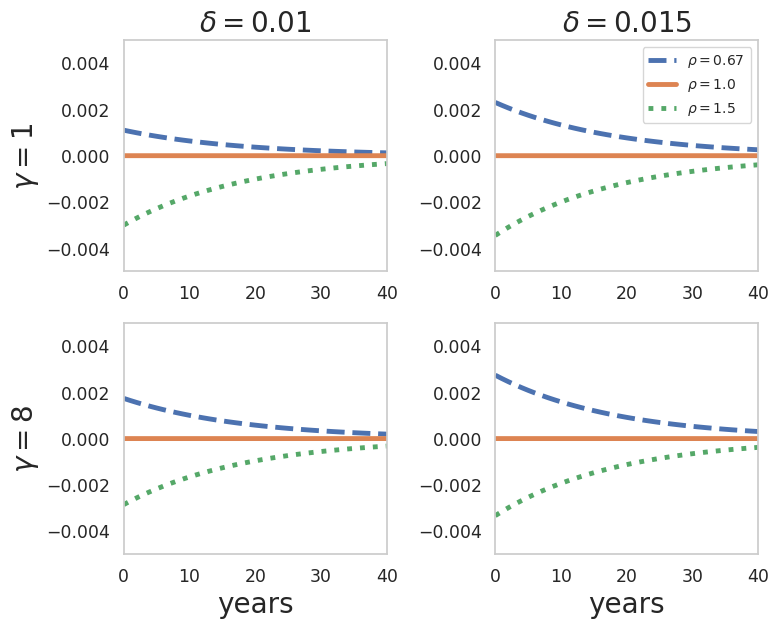

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6.5))

sns.lineplot(data = gamma_1_rho_067_delta_001['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:], label = 'Sqrt Z 10th percentile', ax = axes[0,0], linestyle='dashed')
sns.lineplot(data = gamma_1_rho_100_delta_001['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:], label = 'Sqrt Z 50th percentile', ax = axes[0,0])
sns.lineplot(data = gamma_1_rho_150_delta_001['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:], label = 'Sqrt Z 90th percentile', ax = axes[0,0], linestyle='dotted')
axes[0,0].set_xlim([0,40])
axes[0,0].set_ylabel('$\\gamma = 1$', fontsize=20)
axes[0,0].set_title(r'$\delta=0.01$', fontsize=20)
axes[0,0].set_ylim([-0.005,0.005])
axes[0,0].get_legend().remove()

sns.lineplot(data = gamma_8_rho_067_delta_001['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,0], linestyle='dashed')
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,0])
sns.lineplot(data = gamma_8_rho_150_delta_001['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,0], linestyle='dotted')
axes[1,0].set_xlim([0,40])
axes[1,0].set_ylim([-0.005,0.005])
axes[1,0].set_ylabel('$\\gamma = 8$', fontsize=20)
axes[1,0].set_xlabel('years', fontsize=20)

sns.lineplot(data = gamma_1_rho_067_delta_015['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:], label = r'$\rho=0.67$ ', ax = axes[0,1], linestyle='dashed')
sns.lineplot(data = gamma_1_rho_100_delta_015['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:], label = r'$\rho=1.0$ ', ax = axes[0,1])
sns.lineplot(data = gamma_1_rho_150_delta_015['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:], label = r'$\rho=1.5$ ', ax = axes[0,1], linestyle='dotted')
axes[0,1].set_xlim([0,40])
axes[0,1].set_ylim([-0.005,0.005])
axes[0,1].set_title(r'$\delta=0.015$', fontsize=20)
axes[0,1].legend(loc='upper right', prop={'size': 10})

sns.lineplot(data = gamma_8_rho_067_delta_015['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,1], linestyle='dashed')
sns.lineplot(data = gamma_8_rho_100_delta_015['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,1])
sns.lineplot(data = gamma_8_rho_150_delta_015['elasticity_logimo']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,1], linestyle='dotted')
axes[1,1].set_xlim([0,40])
axes[1,1].set_ylim([-0.005,0.005])
axes[1,1].set_xlabel('years', fontsize=20)

for ax in fig.axes:
    ax.grid(False)
plt.tight_layout()
plt.show()


# Consumption Exposure, Price Elasticities and Uncertainty Price Elasticities

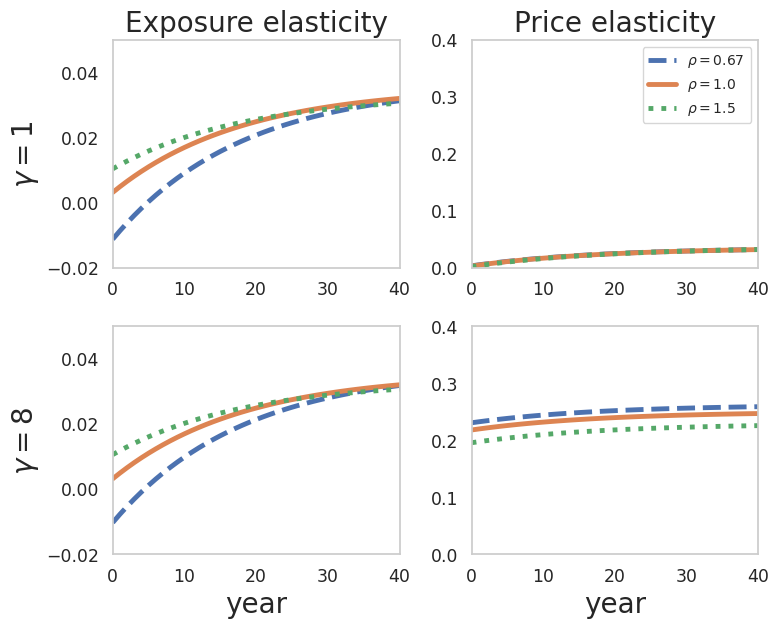

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(8,6.5))

sns.lineplot(data = gamma_1_rho_067_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:], label = 'Sqrt Z 10th percentile', ax = axes[0,0], linestyle='dashed')
sns.lineplot(data = gamma_1_rho_100_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:], label = 'Sqrt Z 50th percentile', ax = axes[0,0])
sns.lineplot(data = gamma_1_rho_150_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:], label = 'Sqrt Z 90th percentile', ax = axes[0,0], linestyle='dotted')
axes[0,0].set_xlim([0,40])
axes[0,0].set_ylabel('$\\gamma = 1$', fontsize=20)
axes[0,0].set_title(r'Exposure elasticity', fontsize=20)
axes[0,0].set_ylim([-0.02,0.05])
axes[0,0].get_legend().remove()

sns.lineplot(data = gamma_8_rho_067_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,0], linestyle='dashed')
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,0])
sns.lineplot(data = gamma_8_rho_150_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[1,0], linestyle='dotted')
axes[1,0].set_xlim([0,40])
axes[1,0].set_ylim([-0.02,0.05])
axes[1,0].set_ylabel('$\\gamma = 8$', fontsize=20)
axes[1,0].set_xlabel('year', fontsize=20)

sns.lineplot(data = gamma_1_rho_067_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:], label = r'$\rho=0.67$ ', ax = axes[0,1], linestyle='dashed')
sns.lineplot(data = gamma_1_rho_100_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:], label = r'$\rho=1.0$ ', ax = axes[0,1])
sns.lineplot(data = gamma_1_rho_150_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:], label = r'$\rho=1.5$ ', ax = axes[0,1], linestyle='dotted')
axes[0,1].set_xlim([0,40])
axes[0,1].set_ylim([0,0.4])
axes[0,1].set_title(r'Price elasticity', fontsize=20)
axes[0,1].legend(loc='upper right', prop={'size': 10})

sns.lineplot(data = gamma_8_rho_067_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:],  ax = axes[1,1], linestyle='dashed')
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:],  ax = axes[1,1])
sns.lineplot(data = gamma_8_rho_150_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:],  ax = axes[1,1], linestyle='dotted')
axes[1,1].set_xlim([0,40])
axes[1,1].set_ylim([0,0.4])
axes[1,1].set_xlabel('year', fontsize=20)

for ax in fig.axes:
    ax.grid(False)
plt.tight_layout()
plt.show()


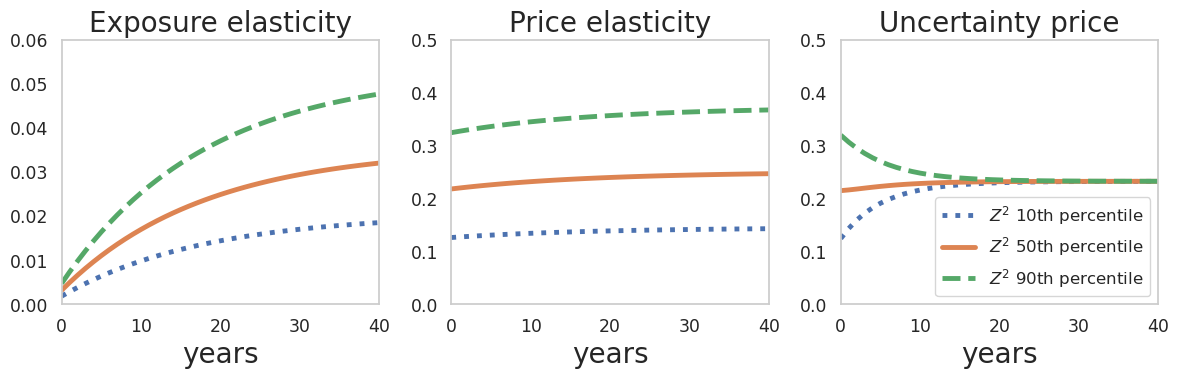

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[0,1,:],  ax = axes[0], linestyle='dotted')
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[1,1,:],  ax = axes[0])
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['exposure_elasticity'].item().firstType[2,1,:],  ax = axes[0], linestyle='dashed')
axes[0].set_xlim([0,40])
axes[0].set_ylim([0,0.06])
axes[0].set_title('Exposure elasticity', fontsize=20)

sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['price_elasticity'].item().firstType[0,1,:], linestyle='dotted', ax = axes[1])
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['price_elasticity'].item().firstType[1,1,:],  ax = axes[1])
sns.lineplot(data = gamma_8_rho_100_delta_001['elasticity_logc']['price_elasticity'].item().firstType[2,1,:], linestyle='dashed',  ax = axes[1])
axes[1].set_xlim([0,40])
axes[1].set_ylim([0,0.5])
axes[1].set_title('Price elasticity', fontsize=20)

sns.lineplot(data = gamma_8_rho_100_delta_001['uncertainty_priceelas']['price_elasticity'].item().secondType[0,1,:], linestyle='dotted', label='$Z^2$ 10th percentile', ax = axes[2])
sns.lineplot(data = gamma_8_rho_100_delta_001['uncertainty_priceelas']['price_elasticity'].item().secondType[1,1,:], label='$Z^2$ 50th percentile', ax = axes[2])
sns.lineplot(data = gamma_8_rho_100_delta_001['uncertainty_priceelas']['price_elasticity'].item().secondType[2,1,:], linestyle='dashed', label='$Z^2$ 90th percentile', ax = axes[2])
axes[2].set_xlim([0,40])
axes[2].set_ylim([0,0.5])
axes[2].legend(loc='lower right', prop={'size': 12})
axes[2].set_title(r'Uncertainty price', fontsize=20)

for ax in fig.axes:
    ax.grid(False)
    ax.set_xlabel('years', fontsize=20)
plt.tight_layout()
plt.show()